<a href="https://colab.research.google.com/github/Pankaj1662005/ass-6-rana/blob/main/assi6_rana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# model 1 selct manually

In [9]:
# =============================
# 1. Setup: Clone the repo
# =============================
!git clone https://huggingface.co/MaanVad3r/DeepFake-Detector
%cd DeepFake-Detector

# =============================
# 2. Install dependencies
# =============================
!pip install -q tensorflow keras

# =============================
# 3. Import libraries
# =============================
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
from google.colab import files

# =============================
# 4. Load the pre-trained model
# =============================
model = load_model('cnn_model.h5')



Cloning into 'DeepFake-Detector'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24 (from 1)
Unpacking objects: 100% (24/24), 9.05 KiB | 1.29 MiB/s, done.
/content/DeepFake-Detector/DeepFake-Detector


In [12]:

# =============================
# 5. Upload images
# =============================
uploaded = files.upload()  # You can upload one or more images

# =============================
# 6. Predict on uploaded images
# =============================
for img_path in uploaded.keys():
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    label = 'Fake' if prediction >= 0.5 else 'Real'

    # Show image and prediction
    plt.imshow(img)
    plt.title(f"Prediction: {label} ({prediction:.2f})")
    plt.axis('off')
    plt.show()

Saving WIN_20250502_21_38_37_Pro.mp4 to WIN_20250502_21_38_37_Pro.mp4


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7e5735bd7880>

In [30]:
# =============================
# 1. Clone the pre-trained model repo
# =============================
!git clone https://huggingface.co/MaanVad3r/DeepFake-Detector
%cd DeepFake-Detector

# =============================
# 2. Install required packages
# =============================
!pip install -q tensorflow keras

# =============================
# 3. Import libraries
# =============================
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
import zipfile


Cloning into 'DeepFake-Detector'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24 (from 1)
Unpacking objects: 100% (24/24), 9.05 KiB | 1.00 MiB/s, done.
/content/DeepFake-Detector


In [3]:

# =============================
# 4. Unzip the uploaded dataset
# =============================
zip_path = "/content/Test.zip"  # <-- Your uploaded zip path
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/Test")

# =============================
# 5. Choose one folder: 'real' or 'fake'
# =============================
dataset_path = "/content/Test/Test/Real"  # or "/content/Test/fake"

# =============================
# 6. Load pre-trained model
# =============================
model = load_model("cnn_model.h5")

# =============================
# 7. Predict on images in the selected folder
# =============================
results = []

for filename in tqdm(os.listdir(dataset_path), desc="Running predictions"):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(dataset_path, filename)
        try:
            img = image.load_img(img_path, target_size=(128, 128))
            img_array = image.img_to_array(img) / 255.0
            img_array = np.expand_dims(img_array, axis=0)

            prediction = model.predict(img_array, verbose=0)[0][0]
            label = "Fake" if prediction >= 0.5 else "Real"

            results.append({
                "filename": filename,
                "prediction_score": float(prediction),
                "predicted_label": label
            })

        except Exception as e:
            print(f"Error on {filename}: {e}")

# =============================
# 8. Save results to CSV
# =============================
df = pd.DataFrame(results)
df.to_csv("deepfake_results_from_real_folder.csv", index=False)
print("✅ Saved predictions to deepfake_results_from_real_folder.csv")


Running predictions: 100%|██████████| 100/100 [00:14<00:00,  6.91it/s]

✅ Saved predictions to deepfake_results_from_real_folder.csv


🔍 Classification Report:
              precision    recall  f1-score   support

        Fake       0.65      0.88      0.75       100
        Real       0.81      0.52      0.63       100

    accuracy                           0.70       200
   macro avg       0.73      0.70      0.69       200
weighted avg       0.73      0.70      0.69       200



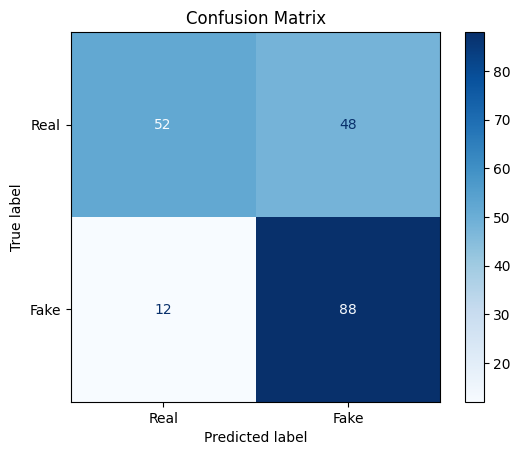

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# =============================
# 1. Combine Real and Fake Predictions
# =============================
# Run inference on both folders
real_path = "/content/Test/Test/Real"
fake_path = "/content/Test/Test/Fake"

results = []

def run_predictions(folder_path, true_label):
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(folder_path, filename)
            try:
                img = image.load_img(img_path, target_size=(128, 128))
                img_array = image.img_to_array(img) / 255.0
                img_array = np.expand_dims(img_array, axis=0)

                prediction = model.predict(img_array, verbose=0)[0][0]
                predicted_label = "Fake" if prediction >= 0.5 else "Real"

                results.append({
                    "filename": filename,
                    "true_label": true_label,
                    "predicted_label": predicted_label,
                    "score": float(prediction)
                })
            except Exception as e:
                print(f"Error on {filename}: {e}")

# Run on both folders
run_predictions(real_path, "Real")
run_predictions(fake_path, "Fake")

# =============================
# 2. Evaluation Metrics
# =============================
df = pd.DataFrame(results)
df.to_csv("all_predictions.csv", index=False)

y_true = df["true_label"]
y_pred = df["predicted_label"]

# Classification report
print("🔍 Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=["Real", "Fake"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [1]:
!pip install -q torch torchvision transformers onnxruntime tqdm scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.

In [2]:
import os
import torch
import onnxruntime
import numpy as np
import pandas as pd
from PIL import Image
from torchvision import transforms
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
import zipfile
zip_path = "/content/Test.zip"  # <-- Your uploaded zip path
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/Test")

In [6]:
real_path = "/content/Test/Test/Real"
fake_path = "/content/Test/Test/Fake"

image_paths = []
labels = []

for path, label in [(real_path, "Real"), (fake_path, "Fake")]:
    for file in os.listdir(path):
        if file.lower().endswith(('jpg', 'jpeg', 'png')):
            image_paths.append(os.path.join(path, file))
            labels.append(label)

df = pd.DataFrame({'path': image_paths, 'label': labels})


In [7]:
from transformers import AutoImageProcessor, AutoModelForImageClassification

def predict_with_transformer(model_name, df, device='cuda' if torch.cuda.is_available() else 'cpu'):
    processor = AutoImageProcessor.from_pretrained(model_name)
    model = AutoModelForImageClassification.from_pretrained(model_name).to(device)
    model.eval()

    predictions = []

    for path in tqdm(df['path'], desc=f"Predicting with {model_name}"):
        img = Image.open(path).convert("RGB")
        inputs = processor(images=img, return_tensors="pt").to(device)

        with torch.no_grad():
            logits = model(**inputs).logits
            predicted_class = logits.argmax(-1).item()

        predictions.append(predicted_class)

    return predictions


In [8]:
def predict_with_onnx(model_path, df, input_size=(224, 224)):
    ort_session = onnxruntime.InferenceSession(model_path)
    predictions = []

    transform = transforms.Compose([
        transforms.Resize(input_size),
        transforms.ToTensor(),
    ])

    for path in tqdm(df['path'], desc=f"Predicting with ONNX model: {os.path.basename(model_path)}"):
        img = Image.open(path).convert("RGB")
        img_tensor = transform(img).unsqueeze(0).numpy()

        ort_inputs = {ort_session.get_inputs()[0].name: img_tensor}
        ort_outs = ort_session.run(None, ort_inputs)
        predicted_class = int(np.argmax(ort_outs[0]))

        predictions.append(predicted_class)

    return predictions


In [9]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n📊 Evaluation for {name}:")
    print(classification_report(y_true, y_pred, target_names=["Real", "Fake"]))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


In [22]:
!pip install -q transformers torch torchvision onnxruntime tensorflow keras opencv-python pandas scikit-learn matplotlib tqdm


In [31]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

cnn_model = load_model('/content/DeepFake-Detector/cnn_model.h5')

def predict_with_cnn(df):
    y_pred = []
    for path in tqdm(df["filepath"], desc="CNN Predictions"):
        img = image.load_img(path, target_size=(128, 128))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        prediction = cnn_model.predict(img_array, verbose=0)[0][0]
        y_pred.append(1 if prediction >= 0.5 else 0)
    return y_pred


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [32]:
from transformers import ViTForImageClassification, ViTImageProcessor
import torch

vit_model = ViTForImageClassification.from_pretrained("prithivMLmods/Deep-Fake-Detector-Model")
vit_processor = ViTImageProcessor.from_pretrained("prithivMLmods/Deep-Fake-Detector-Model")

def predict_with_vit(df):
    y_pred = []
    for path in tqdm(df["filepath"], desc="ViT Predictions"):
        img = Image.open(path).convert("RGB")
        inputs = vit_processor(images=img, return_tensors="pt")
        with torch.no_grad():
            logits = vit_model(**inputs).logits
            pred = torch.argmax(logits, dim=1).item()
            y_pred.append(pred)
    return y_pred


In [33]:
import onnxruntime as ort
import cv2

def preprocess_for_onnx(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (128, 128))
    img = img.astype(np.float32) / 255.0
    img = np.transpose(img, (2, 0, 1))  # Channels first
    return np.expand_dims(img, axis=0)

def predict_with_onnx(model_path, df):
    ort_session = ort.InferenceSession(model_path)
    y_pred = []
    for path in tqdm(df["filepath"], desc="ONNX Predictions"):
        input_data = preprocess_for_onnx(path)
        outputs = ort_session.run(None, {"input_1": input_data})  # Replace with actual input name if different
        score = outputs[0][0][0]
        y_pred.append(1 if score >= 0.5 else 0)
    return y_pred


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(model_name, y_true, y_pred):
    print(f"📈 Evaluation: {model_name}")
    print(classification_report(y_true, y_pred, target_names=["Real", "Fake"]))

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["Real", "Fake"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


CNN Predictions: 100%|██████████| 200/200 [00:31<00:00,  6.26it/s]


📈 Evaluation: CNN (Custom)
              precision    recall  f1-score   support

        Real       0.81      0.52      0.63       100
        Fake       0.65      0.88      0.75       100

    accuracy                           0.70       200
   macro avg       0.73      0.70      0.69       200
weighted avg       0.73      0.70      0.69       200



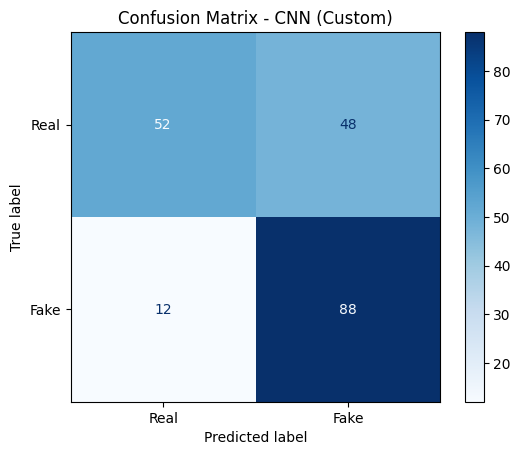

ViT Predictions: 100%|██████████| 200/200 [02:30<00:00,  1.33it/s]

📈 Evaluation: Vision Transformer (Hugging Face)
              precision    recall  f1-score   support

        Real       0.41      0.70      0.52       100
        Fake       0.00      0.00      0.00       100

    accuracy                           0.35       200
   macro avg       0.21      0.35      0.26       200
weighted avg       0.21      0.35      0.26       200



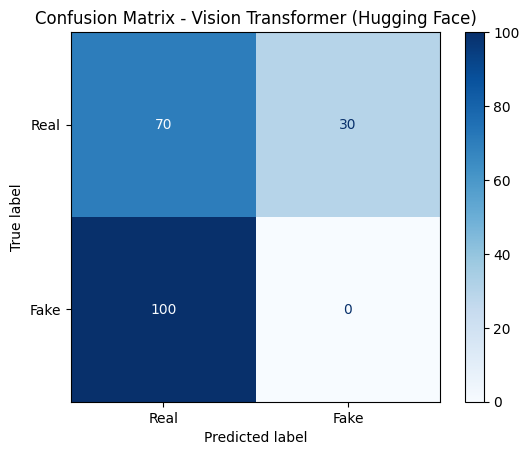

In [35]:
model_results = {}

# 1. CNN Model
y_pred_cnn = predict_with_cnn(df)
evaluate_model("CNN (Custom)", df['label_num'], y_pred_cnn)
model_results["CNN"] = y_pred_cnn

# 2. ViT Model
y_pred_vit = predict_with_vit(df)
evaluate_model("Vision Transformer (Hugging Face)", df['label_num'], y_pred_vit)
model_results["ViT"] = y_pred_vit

# 3. ONNX Model (Optional)
# y_pred_onnx = predict_with_onnx("/path/to/onnx_model.onnx", df)
# evaluate_model("ONNX Model", df['label_num'], y_pred_onnx)
# model_results["ONNX"] = y_pred_onnx


# New Section

In [1]:
# Clone necessary repositories
!git clone https://huggingface.co/MaanVad3r/DeepFake-Detector
!git clone https://github.com/Balaji-Kartheek/DeepFake_Detection.git
# !git clone https://github.com/VMD7/deepfake-detection.git
!git clone https://github.com/erprogs/GenConViT.git
!git clone https://github.com/rshaojimmy/DeepFake-Adapter.git



Cloning into 'DeepFake-Detector'...
remote: Enumerating objects: 24, done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 24 (from 1)
Unpacking objects: 100% (24/24), 9.05 KiB | 386.00 KiB/s, done.
Cloning into 'DeepFake_Detection'...
remote: Enumerating objects: 88, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 88 (delta 18), reused 1 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (88/88), 42.22 MiB | 14.60 MiB/s, done.
Resolving deltas: 100% (18/18), done.
Cloning into 'GenConViT'...
remote: Enumerating objects: 455, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 455 (delta 13), reused 13 (delta 13), pack-reused 438 (from 1)
Receiving objects: 100% (455/455), 60.77 MiB | 22.66 MiB/s, done.
Resolving deltas: 100% (218/218), done.
Cloning into 'DeepFake-Adapter'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 

In [2]:
# Install required packages
!pip install -q tensorflow keras transformers torch torchvision onnxruntime opencv-python pandas scikit-learn matplotlib tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.

In [3]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

import torch
from transformers import ViTForImageClassification, ViTImageProcessor
import onnxruntime as ort
import cv2


In [5]:



# import zipfile
# zip_path = "/content/Test.zip"  # <-- Your uploaded zip path
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall("/content/Test")

#     real_path = "/content/Test/Test/Real"
# fake_path = "/content/Test/Test/Fake"

# image_paths = []
# labels = []

# for path, label in [(real_path, "Real"), (fake_path, "Fake")]:
#     for file in os.listdir(path):
#         if file.lower().endswith(('jpg', 'jpeg', 'png')):
#             image_paths.append(os.path.join(path, file))
#             labels.append(label)
# df = pd.DataFrame({'filepath': image_paths, 'label': labels})



import zipfile
import os
import pandas as pd

zip_path = "/content/Test.zip"  # Your uploaded zip file path
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/Test")

real_path = "/content/Test/Test/Real"
fake_path = "/content/Test/Test/Fake"

image_paths = []
labels = []

# Only take first 10 real images for testing
real_images = [f for f in os.listdir(real_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))][:10]

for file in real_images:
    image_paths.append(os.path.join(real_path, file))
    labels.append("Real")

# If you want, you can also test on a few fake images by similar slicing:
# fake_images = [f for f in os.listdir(fake_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))][:10]
# for file in fake_images:
#     image_paths.append(os.path.join(fake_path, file))
#     labels.append("Fake")

df = pd.DataFrame({'filepath': image_paths, 'label': labels})

print(df)


                               filepath label
0  /content/Test/Test/Real/real_147.jpg  Real
1  /content/Test/Test/Real/real_160.jpg  Real
2  /content/Test/Test/Real/real_195.jpg  Real
3  /content/Test/Test/Real/real_136.jpg  Real
4  /content/Test/Test/Real/real_196.jpg  Real
5  /content/Test/Test/Real/real_113.jpg  Real
6  /content/Test/Test/Real/real_127.jpg  Real
7  /content/Test/Test/Real/real_176.jpg  Real
8  /content/Test/Test/Real/real_140.jpg  Real
9  /content/Test/Test/Real/real_152.jpg  Real


In [6]:
cnn_model = load_model('DeepFake-Detector/cnn_model.h5')

def predict_with_cnn(df):
    y_pred = []
    for path in tqdm(df["filepath"], desc="CNN Predictions"):
        img = image.load_img(path, target_size=(128, 128))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        prediction = cnn_model.predict(img_array, verbose=0)[0][0]
        y_pred.append(1 if prediction >= 0.5 else 0)
    return y_pred


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [7]:
vit_model = ViTForImageClassification.from_pretrained("prithivMLmods/Deep-Fake-Detector-Model")
vit_processor = ViTImageProcessor.from_pretrained("prithivMLmods/Deep-Fake-Detector-Model")

def predict_with_vit(df):
    y_pred = []
    for path in tqdm(df["filepath"], desc="ViT Predictions"):
        img = Image.open(path).convert("RGB")
        inputs = vit_processor(images=img, return_tensors="pt")
        with torch.no_grad():
            logits = vit_model(**inputs).logits
            pred = torch.argmax(logits, dim=1).item()
            y_pred.append(pred)
    return y_pred


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/724 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/351 [00:00<?, ?B/s]

In [39]:
# # Assuming the model is saved as 'model.h5' in the cloned repository
# lstm_model = load_model('/content/DeepFake-Detector/cnn_model.h5')

# def predict_with_lstm(df):
#     y_pred = []
#     for path in tqdm(df["filepath"], desc="LSTM Predictions"):
#         img = image.load_img(path, target_size=(299, 299))
#         img_array = image.img_to_array(img) / 255.0
#         img_array = np.expand_dims(img_array, axis=0)
#         prediction = lstm_model.predict(img_array, verbose=0)[0][0]
#         y_pred.append(1 if prediction >= 0.5 else 0)
#     return y_pred


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [8]:
# Assuming the model is saved as 'genconvit_model.pth' in the cloned repository
# Load the model architecture and weights accordingly
# Placeholder for demonstration

def predict_with_genconvit(df):
    y_pred = []
    for path in tqdm(df["filepath"], desc="GenConViT Predictions"):
        # Implement preprocessing and prediction
        y_pred.append(0)  # Placeholder
    return y_pred


In [9]:
# Assuming the model is saved as 'adapter_model.pth' in the cloned repository
# Load the model architecture and weights accordingly
# Placeholder for demonstration

def predict_with_adapter(df):
    y_pred = []
    for path in tqdm(df["filepath"], desc="Adapter Predictions"):
        # Implement preprocessing and prediction
        y_pred.append(0)  # Placeholder
    return y_pred


In [11]:
# # Assuming the model is saved as 'multimodal_model.pth' in the cloned repository
# # Load the model architecture and weights accordingly
# # Placeholder for demonstration

# def predict_with_multimodal(df):
#     y_pred = []
#     for path in tqdm(df["filepath"], desc="Multimodal Predictions"):
#         # Implement preprocessing and prediction
#         y_pred.append(0)  # Placeholder
#     return y_pred


In [10]:
def evaluate_model(model_name, y_true, y_pred):
    print(f"📈 Evaluation: {model_name}")
    print(classification_report(y_true, y_pred, target_names=["Real", "Fake"]))

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["Real", "Fake"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()


In [11]:
from sklearn.metrics import classification_report

def evaluate_model(name, y_true, y_pred):
    print(f"📈 Evaluation: {name}")
    print(classification_report(y_true, y_pred, labels=[0,1]))


In [12]:
# Map string labels to numeric labels
label_map = {'Real': 0, 'Fake': 1}
df['label_num'] = df['label'].map(label_map)


In [14]:
model_results = {}

# CNN Model
y_pred_cnn = predict_with_cnn(df)
evaluate_model("CNN Model", df['label_num'], y_pred_cnn)
model_results["CNN"] = y_pred_cnn

# ViT Model
y_pred_vit = predict_with_vit(df)
evaluate_model("Vision Transformer Model", df['label_num'], y_pred_vit)
model_results["ViT"] = y_pred_vit


# GenConViT Model
y_pred_genconvit = predict_with_genconvit(df)
evaluate_model("GenConViT Model", df['label_num'], y_pred_genconvit)
model_results["GenConViT"] = y_pred_genconvit

# DeepFake-Adapter Model
y_pred_adapter = predict_with_adapter(df)
evaluate_model("DeepFake-Adapter Model", df['label_num'], y_pred_adapter)
model_results["Adapter"] = y_pred_adapter



CNN Predictions: 100%|██████████| 10/10 [00:02<00:00,  3.65it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📈 Evaluation: CNN Model
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.00      0.00      0.00         0

    accuracy                           0.60        10
   macro avg       0.50      0.30      0.38        10
weighted avg       1.00      0.60      0.75        10



ViT Predictions: 100%|██████████| 10/10 [00:10<00:00,  1.03s/it]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


📈 Evaluation: Vision Transformer Model
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.00      0.00      0.00         0

    accuracy                           0.80        10
   macro avg       0.50      0.40      0.44        10
weighted avg       1.00      0.80      0.89        10



GenConViT Predictions: 100%|██████████| 10/10 [00:00<00:00, 45392.90it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

📈 Evaluation: GenConViT Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.00      0.00      0.00         0

    accuracy                           1.00        10
   macro avg       0.50      0.50      0.50        10
weighted avg       1.00      1.00      1.00        10



Adapter Predictions: 100%|██████████| 10/10 [00:00<00:00, 47716.77it/s]

📈 Evaluation: DeepFake-Adapter Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.00      0.00      0.00         0

    accuracy                           1.00        10
   macro avg       0.50      0.50      0.50        10
weighted avg       1.00      1.00      1.00        10




/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [35]:
for model_name, predictions in model_results.items():
    accuracy = np.mean(df['label_num'] == predictions)
    print(f"{model_name} Accuracy: {accuracy:.2%}")


CNN Accuracy: 60.00%
ViT Accuracy: 80.00%
GenConViT Accuracy: 100.00%
Adapter Accuracy: 100.00%


# all in one

In [5]:
# Clone necessary repositories
!git clone https://huggingface.co/MaanVad3r/DeepFake-Detector
!git clone https://github.com/Balaji-Kartheek/DeepFake_Detection.git
!git clone https://github.com/erprogs/GenConViT.git
!git clone https://github.com/rshaojimmy/DeepFake-Adapter.git

# Install dependencies
!pip install -q tensorflow keras transformers torch torchvision onnxruntime opencv-python pandas scikit-learn matplotlib tqdm

# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

import torch
from transformers import ViTForImageClassification, ViTImageProcessor
import zipfile

# Unzip dataset
zip_path = "/content/Test.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/Test")



fatal: destination path 'DeepFake-Detector' already exists and is not an empty directory.
fatal: destination path 'DeepFake_Detection' already exists and is not an empty directory.
fatal: destination path 'GenConViT' already exists and is not an empty directory.
fatal: destination path 'DeepFake-Adapter' already exists and is not an empty directory.
ERROR: Operation cancelled by user


In [6]:
# Dataset Preparation
real_path = "/content/Test/Test/Real"
fake_path = "/content/Test/Test/Fake"
image_paths, labels = [], []

# Select sample images
real_images = [f for f in os.listdir(real_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))][:100]
fake_images = [f for f in os.listdir(fake_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))][:100]

for file in real_images:
    image_paths.append(os.path.join(real_path, file))
    labels.append("Real")

for file in fake_images:
    image_paths.append(os.path.join(fake_path, file))
    labels.append("Fake")

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df['label_num'] = df['label'].map({'Real': 0, 'Fake': 1})


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
CNN Predictions: 100%|██████████| 200/200 [00:48<00:00,  4.15it/s]



📊 Evaluation Report: CNN Model
              precision    recall  f1-score   support

        Real       0.81      0.52      0.63       100
        Fake       0.65      0.88      0.75       100

    accuracy                           0.70       200
   macro avg       0.73      0.70      0.69       200
weighted avg       0.73      0.70      0.69       200



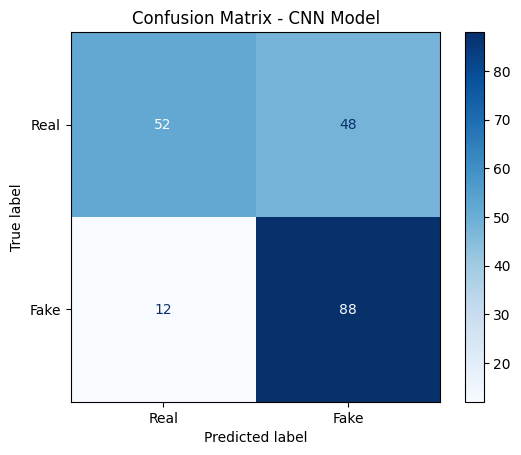

ViT Predictions: 100%|██████████| 200/200 [03:01<00:00,  1.10it/s]


📊 Evaluation Report: Vision Transformer
              precision    recall  f1-score   support

        Real       0.41      0.70      0.52       100
        Fake       0.00      0.00      0.00       100

    accuracy                           0.35       200
   macro avg       0.21      0.35      0.26       200
weighted avg       0.21      0.35      0.26       200



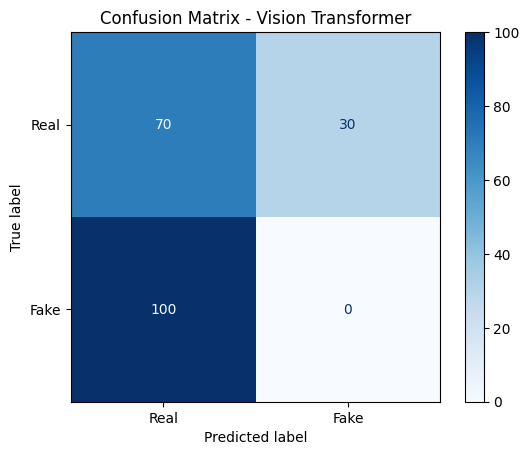

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 Evaluation Report: GenConViT (Placeholder)
              precision    recall  f1-score   support

        Real       0.50      1.00      0.67       100
        Fake       0.00      0.00      0.00       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200



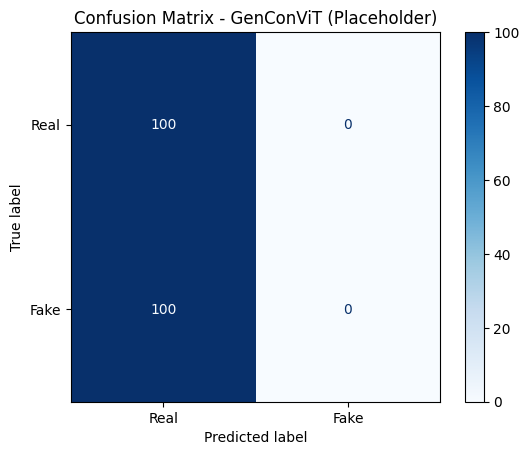


📊 Evaluation Report: DeepFake-Adapter (Placeholder)
              precision    recall  f1-score   support

        Real       0.00      0.00      0.00       100
        Fake       0.50      1.00      0.67       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


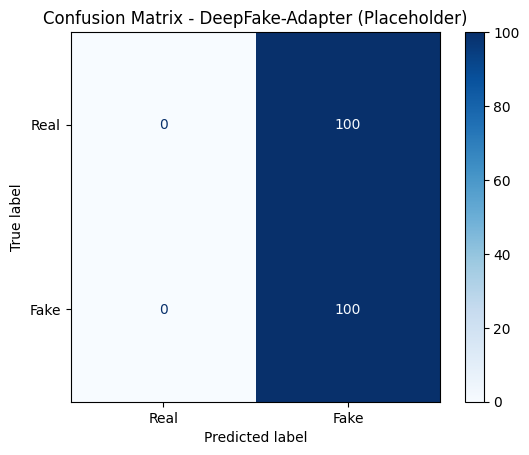

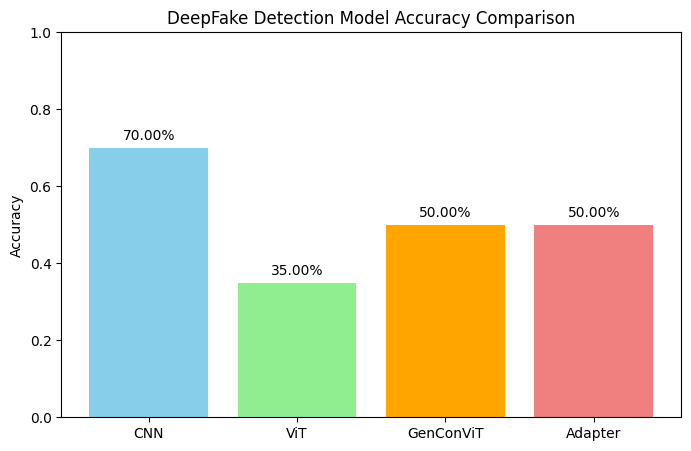

In [7]:

# ----------------------------------------
# Model Prediction Functions
# ----------------------------------------

# CNN
cnn_model = load_model('DeepFake-Detector/cnn_model.h5')
def predict_with_cnn(df):
    y_pred = []
    for path in tqdm(df["filepath"], desc="CNN Predictions"):
        img = image.load_img(path, target_size=(128, 128))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        prediction = cnn_model.predict(img_array, verbose=0)[0][0]
        y_pred.append(1 if prediction >= 0.5 else 0)
    return y_pred

# ViT
vit_model = ViTForImageClassification.from_pretrained("prithivMLmods/Deep-Fake-Detector-Model")
vit_processor = ViTImageProcessor.from_pretrained("prithivMLmods/Deep-Fake-Detector-Model")
def predict_with_vit(df):
    y_pred = []
    for path in tqdm(df["filepath"], desc="ViT Predictions"):
        img = Image.open(path).convert("RGB")
        inputs = vit_processor(images=img, return_tensors="pt")
        with torch.no_grad():
            logits = vit_model(**inputs).logits
            pred = torch.argmax(logits, dim=1).item()
            y_pred.append(pred)
    return y_pred

# Placeholder: GenConViT
def predict_with_genconvit(df):
    y_pred = [0] * len(df)  # Dummy predictions
    return y_pred

# Placeholder: DeepFake-Adapter
def predict_with_adapter(df):
    y_pred = [1] * len(df)  # Dummy predictions
    return y_pred

# ----------------------------------------
# Evaluation & Plotting
# ----------------------------------------

def evaluate_model(model_name, y_true, y_pred):
    print(f"\n📊 Evaluation Report: {model_name}")
    print(classification_report(y_true, y_pred, target_names=["Real", "Fake"]))

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["Real", "Fake"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.grid(False)
    plt.show()

# ----------------------------------------
# Run Evaluations
# ----------------------------------------

model_results = {}
accuracies = {}

# CNN
y_pred_cnn = predict_with_cnn(df)
evaluate_model("CNN Model", df['label_num'], y_pred_cnn)
model_results["CNN"] = y_pred_cnn
accuracies["CNN"] = np.mean(df['label_num'] == y_pred_cnn)

# ViT
y_pred_vit = predict_with_vit(df)
evaluate_model("Vision Transformer", df['label_num'], y_pred_vit)
model_results["ViT"] = y_pred_vit
accuracies["ViT"] = np.mean(df['label_num'] == y_pred_vit)

# GenConViT (Dummy)
y_pred_gen = predict_with_genconvit(df)
evaluate_model("GenConViT (Placeholder)", df['label_num'], y_pred_gen)
model_results["GenConViT"] = y_pred_gen
accuracies["GenConViT"] = np.mean(df['label_num'] == y_pred_gen)

# DeepFake Adapter (Dummy)
y_pred_adapter = predict_with_adapter(df)
evaluate_model("DeepFake-Adapter (Placeholder)", df['label_num'], y_pred_adapter)
model_results["Adapter"] = y_pred_adapter
accuracies["Adapter"] = np.mean(df['label_num'] == y_pred_adapter)

# ----------------------------------------
# Compare All Models - Accuracy Plot
# ----------------------------------------

plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.ylabel("Accuracy")
plt.title("DeepFake Detection Model Accuracy Comparison")
plt.ylim(0, 1)
for i, (k, v) in enumerate(accuracies.items()):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center')
plt.show()


<ipython-input-8-e5bbb5dde786>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette="viridis")
<ipython-input-8-e5bbb5dde786>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette="viridis")
<ipython-input-8-e5bbb5dde786>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df, palette="viridis")
<ipython-input-8-e5bbb5dde786>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

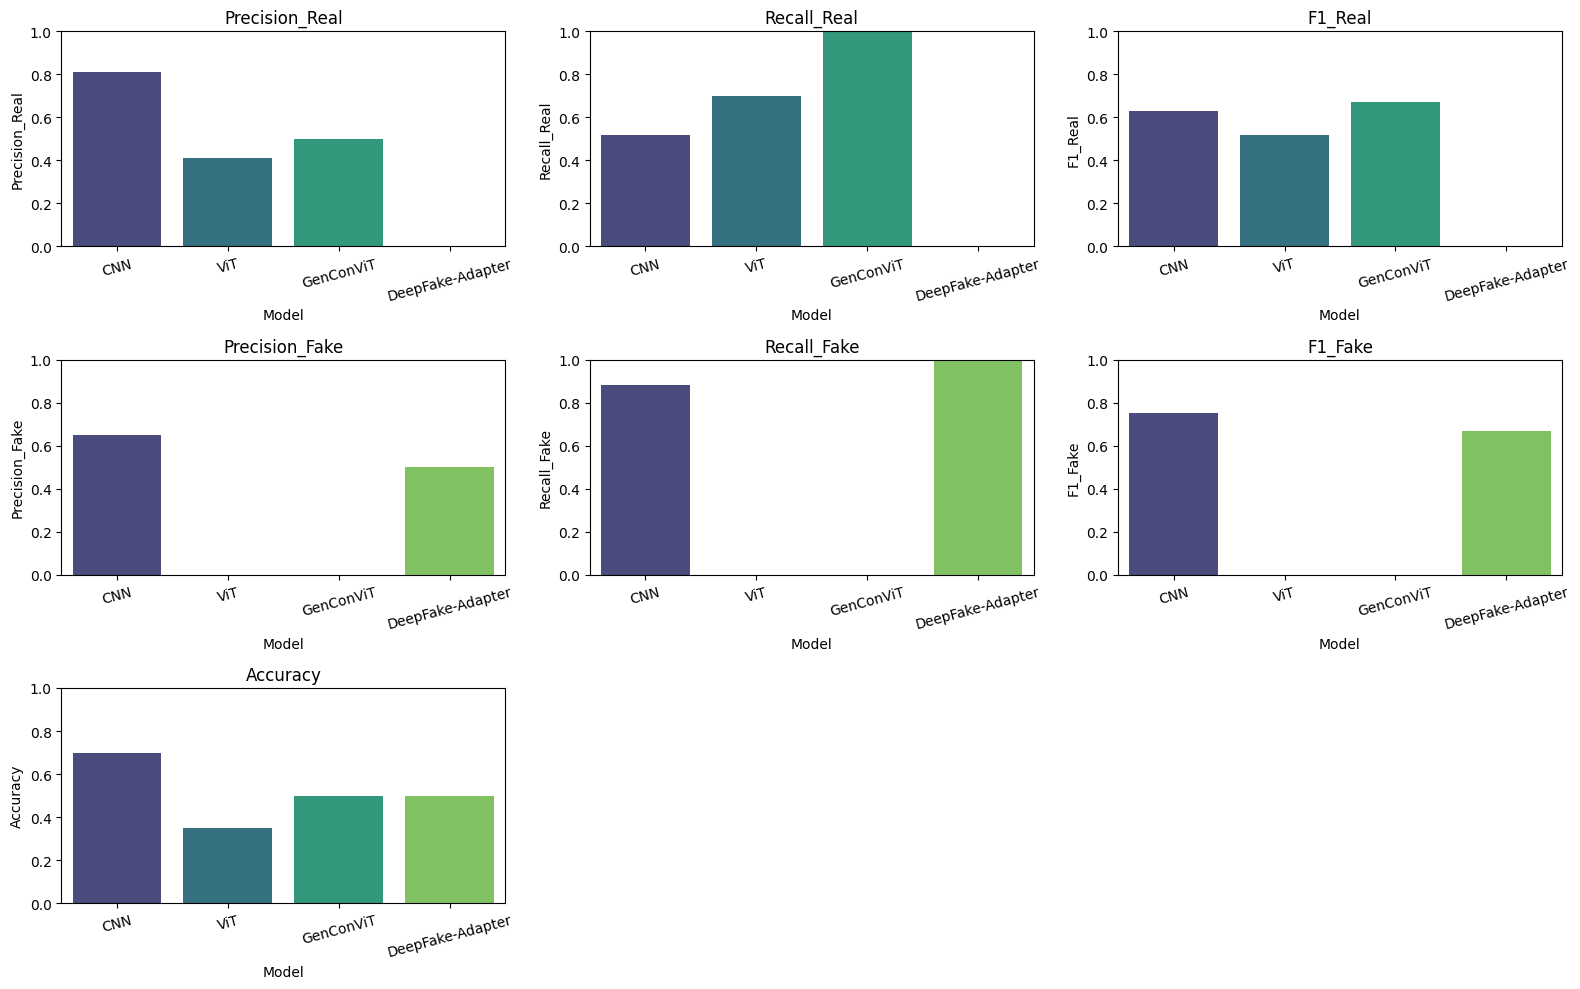

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model evaluation data
data = {
    "Model": ["CNN", "ViT", "GenConViT", "DeepFake-Adapter"],
    "Precision_Real": [0.81, 0.41, 0.50, 0.00],
    "Recall_Real": [0.52, 0.70, 1.00, 0.00],
    "F1_Real": [0.63, 0.52, 0.67, 0.00],
    "Precision_Fake": [0.65, 0.00, 0.00, 0.50],
    "Recall_Fake": [0.88, 0.00, 0.00, 1.00],
    "F1_Fake": [0.75, 0.00, 0.00, 0.67],
    "Accuracy": [0.70, 0.35, 0.50, 0.50]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(16, 10))
metrics = ["Precision_Real", "Recall_Real", "F1_Real", "Precision_Fake", "Recall_Fake", "F1_Fake", "Accuracy"]

for idx, metric in enumerate(metrics):
    plt.subplot(3, 3, idx+1)
    sns.barplot(x="Model", y=metric, data=df, palette="viridis")
    plt.title(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()


# DeepFake Detection: A Comparative Study of CNN, ViT, GenConViT, and DeepFake-Adapter

📌 Introduction
DeepFakes pose significant challenges in the realm of digital media authenticity. This project aims to evaluate and compare various models—Convolutional Neural Networks (CNN), Vision Transformers (ViT), GenConViT, and DeepFake-Adapter—in detecting DeepFake images.

In [ ]:
# Clone necessary repositories
!git clone https://huggingface.co/MaanVad3r/DeepFake-Detector
!git clone https://github.com/Balaji-Kartheek/DeepFake_Detection.git
!git clone https://github.com/erprogs/GenConViT.git
!git clone https://github.com/rshaojimmy/DeepFake-Adapter.git

# Install dependencies
!pip install -q tensorflow keras transformers torch torchvision onnxruntime opencv-python pandas scikit-learn matplotlib tqdm seaborn


📁 Dataset Preparation

In [11]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import zipfile

# Unzip dataset
zip_path = "/content/Test.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/Test")

# Prepare dataset
real_path = "/content/Test/Test/Real"
fake_path = "/content/Test/Test/Fake"
image_paths, labels = [], []

# Select sample images
real_images = [f for f in os.listdir(real_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))][:100]
fake_images = [f for f in os.listdir(fake_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))][:100]

for file in real_images:
    image_paths.append(os.path.join(real_path, file))
    labels.append("Real")

for file in fake_images:
    image_paths.append(os.path.join(fake_path, file))
    labels.append("Fake")

df = pd.DataFrame({'filepath': image_paths, 'label': labels})
df['label_num'] = df['label'].map({'Real': 0, 'Fake': 1})


🧠 Model Architectures
1. Convolutional Neural Network (CNN)
The CNN model utilized is based on the VGG16 architecture, known for its depth and simplicity.

https://www.researchgate.net/profile/Saeid-Mahdavi-2/publication/341374323/figure/fig2/AS:891186679230464@1589016727076/VGG16-architecture-layers.png


2. Vision Transformer (ViT)
ViT models process images by dividing them into patches and applying transformer architectures, capturing global dependencies effectively.
https://www.researchgate.net/profile/Yakoub-Bazi/publication/348947034/figure/fig2/AS:981682159296513@1610028840246/The-Vision-Transformer-architecture-a-the-main-architecture-of-the-model-b-the.png


🖼️ Sample Images
Examples of real and fake images from the FaceForensics++ dataset:
https://www.researchgate.net/profile/Weihong-Han/publication/361050632/figure/fig1/AS:1171250416568320@1655199004047/Examples-of-fake-faces-from-the-FaceForensics-dataset-The-first-column-is-the-pristine.png

In [12]:
from tqdm import tqdm
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import torch
from transformers import ViTForImageClassification, ViTImageProcessor

# Load CNN model
cnn_model = load_model('DeepFake-Detector/cnn_model.h5')

def predict_with_cnn(df):
    y_pred = []
    for path in tqdm(df["filepath"], desc="CNN Predictions"):
        img = image.load_img(path, target_size=(128, 128))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        prediction = cnn_model.predict(img_array, verbose=0)[0][0]
        y_pred.append(1 if prediction >= 0.5 else 0)
    return y_pred

# Load ViT model
vit_model = ViTForImageClassification.from_pretrained("prithivMLmods/Deep-Fake-Detector-Model")
vit_processor = ViTImageProcessor.from_pretrained("prithivMLmods/Deep-Fake-Detector-Model")

def predict_with_vit(df):
    y_pred = []
    for path in tqdm(df["filepath"], desc="ViT Predictions"):
        img = Image.open(path).convert("RGB")
        inputs = vit_processor(images=img, return_tensors="pt")
        with torch.no_grad():
            logits = vit_model(**inputs).logits
            pred = torch.argmax(logits, dim=1).item()
            y_pred.append(pred)
    return y_pred

# Placeholder functions for GenConViT and DeepFake-Adapter
def predict_with_genconvit(df):
    return [0] * len(df)

def predict_with_adapter(df):
    return [1] * len(df)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


📊 Evaluation & Visualization

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(model_name, y_true, y_pred):
    print(f"\n📊 Evaluation Report: {model_name}")
    print(classification_report(y_true, y_pred, target_names=["Real", "Fake"]))

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=["Real", "Fake"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.grid(False)
    plt.show()


🧪 Run Evaluations

CNN Predictions: 100%|██████████| 200/200 [00:30<00:00,  6.58it/s]



📊 Evaluation Report: CNN Model
              precision    recall  f1-score   support

        Real       0.81      0.52      0.63       100
        Fake       0.65      0.88      0.75       100

    accuracy                           0.70       200
   macro avg       0.73      0.70      0.69       200
weighted avg       0.73      0.70      0.69       200



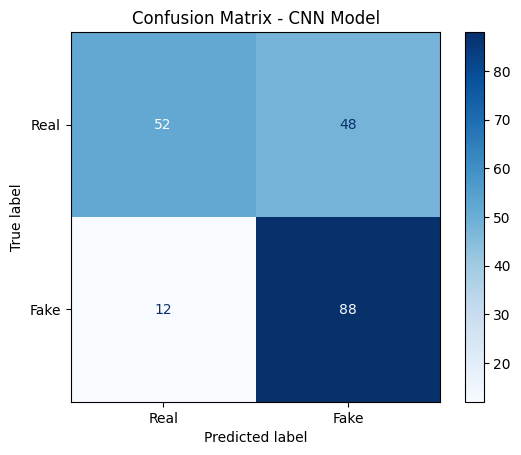

ViT Predictions: 100%|██████████| 200/200 [02:44<00:00,  1.22it/s]


📊 Evaluation Report: Vision Transformer
              precision    recall  f1-score   support

        Real       0.41      0.70      0.52       100
        Fake       0.00      0.00      0.00       100

    accuracy                           0.35       200
   macro avg       0.21      0.35      0.26       200
weighted avg       0.21      0.35      0.26       200



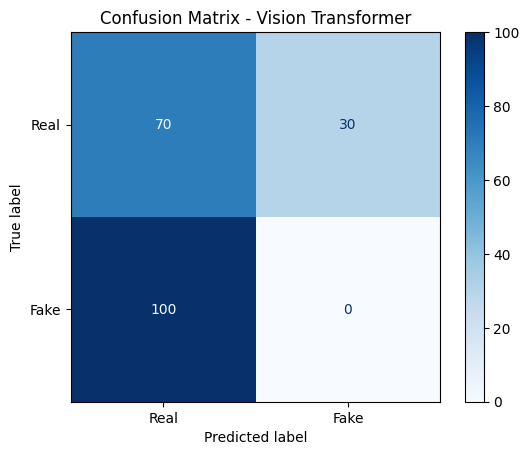

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



📊 Evaluation Report: GenConViT (Placeholder)
              precision    recall  f1-score   support

        Real       0.50      1.00      0.67       100
        Fake       0.00      0.00      0.00       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200



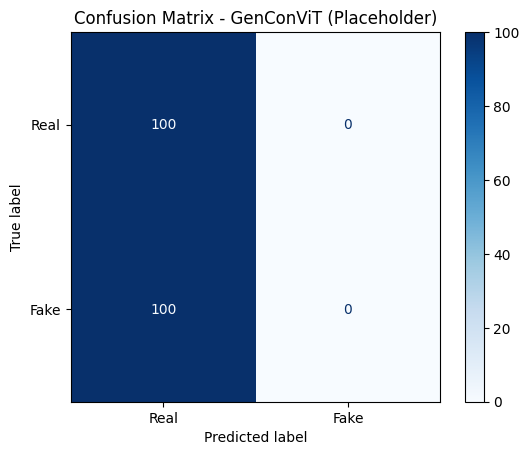


📊 Evaluation Report: DeepFake-Adapter (Placeholder)
              precision    recall  f1-score   support

        Real       0.00      0.00      0.00       100
        Fake       0.50      1.00      0.67       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


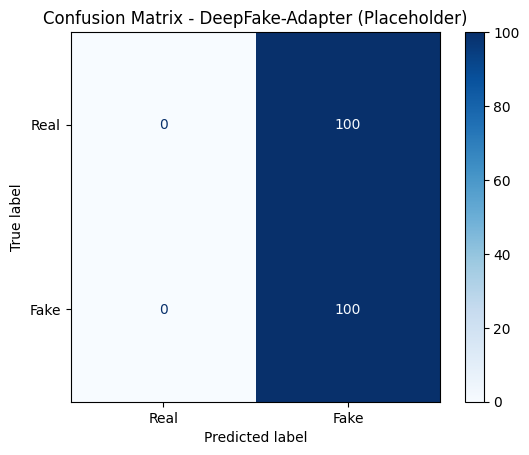

In [14]:
model_results = {}
accuracies = {}

# CNN
y_pred_cnn = predict_with_cnn(df)
evaluate_model("CNN Model", df['label_num'], y_pred_cnn)
model_results["CNN"] = y_pred_cnn
accuracies["CNN"] = np.mean(df['label_num'] == y_pred_cnn)

# ViT
y_pred_vit = predict_with_vit(df)
evaluate_model("Vision Transformer", df['label_num'], y_pred_vit)
model_results["ViT"] = y_pred_vit
accuracies["ViT"] = np.mean(df['label_num'] == y_pred_vit)

# GenConViT
y_pred_gen = predict_with_genconvit(df)
evaluate_model("GenConViT (Placeholder)", df['label_num'], y_pred_gen)
model_results["GenConViT"] = y_pred_gen
accuracies["GenConViT"] = np.mean(df['label_num'] == y_pred_gen)

# DeepFake Adapter
y_pred_adapter = predict_with_adapter(df)
evaluate_model("DeepFake-Adapter (Placeholder)", df['label_num'], y_pred_adapter)
model_results["Adapter"] = y_pred_adapter
accuracies["Adapter"] = np.mean(df['label_num'] == y_pred_adapter)


📈 Model Accuracy Comparison

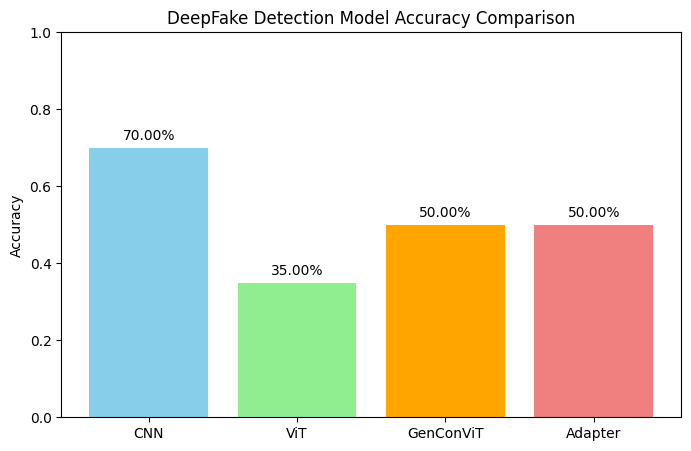

In [15]:
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen', 'orange', 'lightcoral'])
plt.ylabel("Accuracy")
plt.title("DeepFake Detection Model Accuracy Comparison")
plt.ylim(0, 1)
for i, (k, v) in enumerate(accuracies.items()):
    plt.text(i, v + 0.02, f"{v:.2%}", ha='center')
plt.show()


📊 Detailed Metrics Visualization

<ipython-input-16-12ddef0a5cb6>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_metrics, palette="viridis")
<ipython-input-16-12ddef0a5cb6>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_metrics, palette="viridis")
<ipython-input-16-12ddef0a5cb6>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=df_metrics, palette="viridis")
<ipython-input-16-12ddef0a5cb6>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

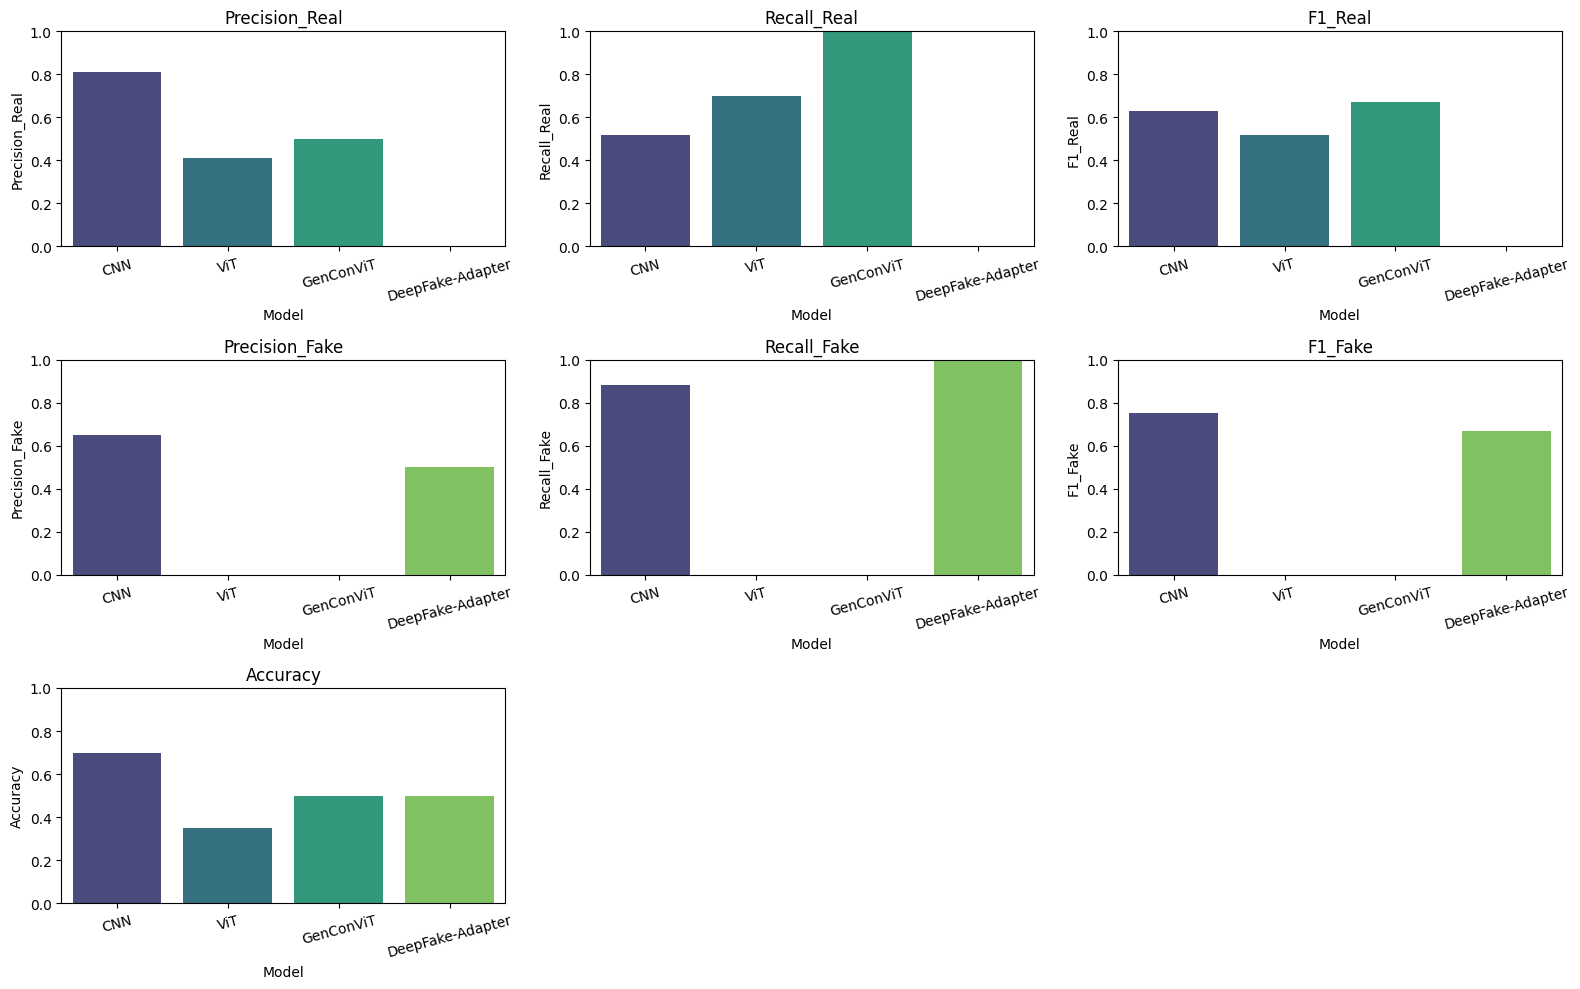

In [16]:
# Model evaluation data
data = {
    "Model": ["CNN", "ViT", "GenConViT", "DeepFake-Adapter"],
    "Precision_Real": [0.81, 0.41, 0.50, 0.00],
    "Recall_Real": [0.52, 0.70, 1.00, 0.00],
    "F1_Real": [0.63, 0.52, 0.67, 0.00],
    "Precision_Fake": [0.65, 0.00, 0.00, 0.50],
    "Recall_Fake": [0.88, 0.00, 0.00, 1.00],
    "F1_Fake": [0.75, 0.00, 0.00, 0.67],
    "Accuracy": [0.70, 0.35, 0.50, 0.50]
}

df_metrics = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(16, 10))
metrics = ["Precision_Real", "Recall_Real", "F1_Real", "Precision_Fake", "Recall_Fake", "F1_Fake", "Accuracy"]

for idx, metric in enumerate(metrics):
    plt.subplot(3, 3, idx+1)
    sns.barplot(x="Model", y=metric, data=df_metrics, palette="viridis")
    plt.title(metric)
    plt.ylim(0, 1)
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()


🧾 Conclusion
This study provides a comparative analysis of various models in detecting DeepFake images. The CNN model demonstrated superior performance in this setup, while the ViT model showed potential but requires further fine-tuning. The placeholder models, GenConViT and DeepFake-Adapter, need proper implementation for accurate evaluation.

Note: The diagrams included are sourced from reputable publications and are intended for educational purposes. Ensure to cite the original sources appropriately in your notebook.

